# **Introduzione al Machine Learning -- laboratorio 9 e 10**


* PCA
* Generare una multinomiale
* Generare una distribuzione di Dirichlet
* Gaussiane multivariate



In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition

df = pd.read_excel('body.xlsx', index_col=0)
df

,Biacromial diameter (see Fig. 2),"Biiliac diameter, or ""pelvic breadth"" (see Fig. 2)",Bitrochanteric diameter (see Fig. 2),"Chest depth between spine and sternum at nipple level,","Chest diameter at nipple level, mid-expiration","Elbow diameter, sum of two elbows","Wrist diameter, sum of two wrists","Knee diameter, sum of two knees","Ankle diameter, sum of two ankles",Shoulder girth over deltoid muscles,...,"Bicep girth, flexed, average of right and left girths","Forearm girth, extended, palm up, average of right and","Knee girth over patella, slightly flexed position, average","Calf maximum girth, average of right and left girths","Ankle minimum girth, average of right and left girths","Wrist minimum girth, average of right and left girths",Age (years),Weight (kg),Height (cm),"Gender (1 - male, 0 - female)"
Id,,,,,,,,,,,,,,,,,,,,,
1,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,...,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
2,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,...,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
3,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,...,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1
4,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,...,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1
5,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,...,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,38.0,30.4,32.9,17.0,27.1,12.9,10.4,19.5,14.4,108.4,...,30.3,25.4,37.7,37.9,22.4,15.4,29,71.8,176.5,0
504,35.3,28.7,30.4,17.7,25.6,12.4,9.8,17.3,13.6,99.3,...,30.1,23.6,35.6,33.3,22.4,15.2,21,55.5,164.4,0
505,34.7,24.9,24.7,17.3,24.2,12.0,10.2,18.0,13.6,91.9,...,27.4,24.0,34.4,34.1,21.2,15.5,33,48.6,160.7,0


In [3]:
mu = df.mean() # media campionaria
mu

Biacromial diameter (see Fig. 2)                               38.811440
Biiliac diameter, or "pelvic breadth" (see Fig. 2)             27.829980
Bitrochanteric diameter (see Fig. 2)                           31.980473
Chest depth between spine and sternum at nipple level,         19.226036
Chest diameter at nipple level, mid-expiration                 27.973767
Elbow diameter, sum of two elbows                              13.385207
Wrist diameter, sum of two wrists                              10.542604
Knee diameter, sum of two knees                                18.810651
Ankle diameter, sum of two ankles                              13.863314
Shoulder girth over deltoid muscles                           108.195069
Chest girth, nipple line in males and just above breast        93.333531
Waist girth, narrowest part of torso below the rib cage,       76.979487
Navel (or "Abdominal") girth at umbilicus and iliac crest,     85.653846
Hip girth at level of bitrochanteric diameter      

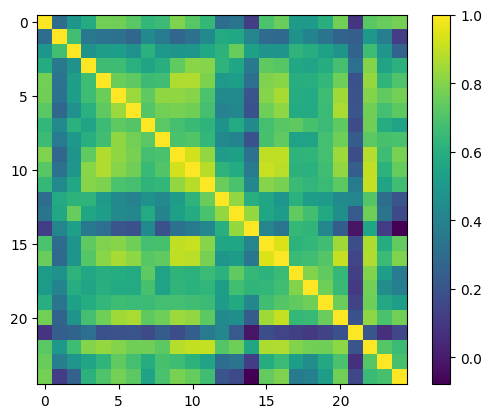

In [4]:
corr = df.corr()
plt.imshow(corr)
plt.colorbar()
plt.show()

In [5]:
std_df = (df - df.mean())/df.std()

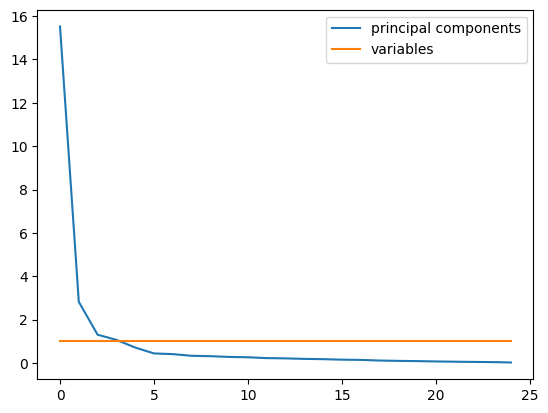

In [15]:
pca = decomposition.PCA()
pca.fit(std_df)
plt.plot(pca.explained_variance_, label='principal components')
plt.plot(std_df.var().to_numpy(), label='variables')
plt.legend()
plt.show()

In [16]:
print(pca.explained_variance_)
print(sum(pca.explained_variance_))
print(std_df.var().to_numpy())

[15.52256755  2.81600309  1.30024788  1.06280365  0.70869538  0.4364584
  0.40452062  0.32730651  0.30962738  0.2747033   0.25951976  0.21984207
  0.20841872  0.1848665   0.17188463  0.14861191  0.13760112  0.1091564
  0.09259476  0.08229005  0.06639917  0.0550151   0.04487785  0.03700813
  0.01898004]
25.000000000000004
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]


(25, 25)


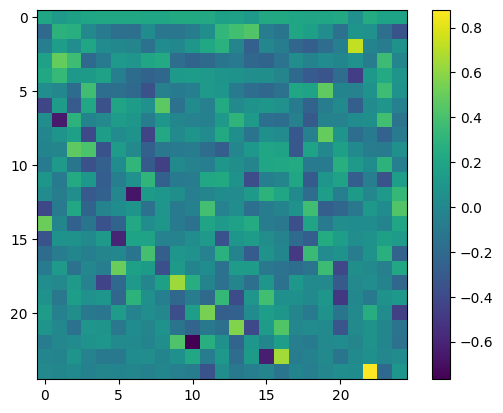

In [19]:
print(pca.components_.shape)
plt.imshow(pca.components_)
plt.colorbar()
plt.show()

In [25]:
print(pca.components_[0])
print(np.square(pca.components_[0]).sum())

[0.20148176 0.12228632 0.17156755 0.20342225 0.21952186 0.2224409
 0.2136006  0.20694909 0.20465261 0.23128974 0.2330414  0.22511159
 0.1699643  0.17786008 0.1196246  0.22857474 0.23301796 0.19935879
 0.19515904 0.20418704 0.22657073 0.06544149 0.24622156 0.18693155
 0.18726039]
0.9999999999999997


In [27]:
pd.Series(pca.components_[1], index=df.columns)

Biacromial diameter (see Fig. 2)                             -0.203040
Biiliac diameter, or "pelvic breadth" (see Fig. 2)            0.293354
Bitrochanteric diameter (see Fig. 2)                          0.262308
Chest depth between spine and sternum at nipple level,        0.004366
Chest diameter at nipple level, mid-expiration               -0.087474
Elbow diameter, sum of two elbows                            -0.162308
Wrist diameter, sum of two wrists                            -0.162928
Knee diameter, sum of two knees                               0.032542
Ankle diameter, sum of two ankles                            -0.123304
Shoulder girth over deltoid muscles                          -0.121082
Chest girth, nipple line in males and just above breast      -0.073412
Waist girth, narrowest part of torso below the rib cage,      0.049814
Navel (or "Abdominal") girth at umbilicus and iliac crest,    0.320683
Hip girth at level of bitrochanteric diameter                 0.382802
Thigh 

In [28]:
pd.Series(pca.components_[2], index=df.columns)

Biacromial diameter (see Fig. 2)                             -0.061398
Biiliac diameter, or "pelvic breadth" (see Fig. 2)            0.156479
Bitrochanteric diameter (see Fig. 2)                          0.040761
Chest depth between spine and sternum at nipple level,        0.205333
Chest diameter at nipple level, mid-expiration                0.025847
Elbow diameter, sum of two elbows                            -0.001683
Wrist diameter, sum of two wrists                            -0.018145
Knee diameter, sum of two knees                              -0.145417
Ankle diameter, sum of two ankles                             0.034139
Shoulder girth over deltoid muscles                           0.000903
Chest girth, nipple line in males and just above breast       0.103784
Waist girth, narrowest part of torso below the rib cage,      0.215211
Navel (or "Abdominal") girth at umbilicus and iliac crest,    0.281787
Hip girth at level of bitrochanteric diameter                -0.016410
Thigh 

In [29]:
pca.singular_values_

array([88.62516109, 37.74781535, 25.6500571 , 23.19005496, 18.93673313,
       14.86095389, 14.30690169, 12.86923052, 12.51684684, 11.78982057,
       11.45936301, 10.54704172, 10.26936574,  9.67173447,  9.325965  ,
        8.67165661,  8.34422955,  7.43190016,  6.84492145,  6.45281084,
        5.79637629,  5.27613882,  4.76531155,  4.32736801,  3.09901611])

In [31]:
pca.feature_names_in_

array(['Biacromial diameter (see Fig. 2)',
       'Biiliac diameter, or "pelvic breadth" (see Fig. 2)',
       'Bitrochanteric diameter (see Fig. 2)',
       'Chest depth between spine and sternum at nipple level,',
       'Chest diameter at nipple level, mid-expiration',
       'Elbow diameter, sum of two elbows',
       'Wrist diameter, sum of two wrists',
       'Knee diameter, sum of two knees',
       'Ankle diameter, sum of two ankles',
       'Shoulder girth over deltoid muscles',
       'Chest girth, nipple line in males and just above breast',
       'Waist girth, narrowest part of torso below the rib cage,',
       'Navel (or "Abdominal") girth at umbilicus and iliac crest,',
       'Hip girth at level of bitrochanteric diameter',
       'Thigh girth below gluteal fold, average of right and left',
       'Bicep girth, flexed, average of right and left girths',
       'Forearm girth, extended, palm up, average of right and',
       'Knee girth over patella, slightly flexed pos

In [34]:
rotated = pca.transform(std_df)
rotated.shape

(507, 25)

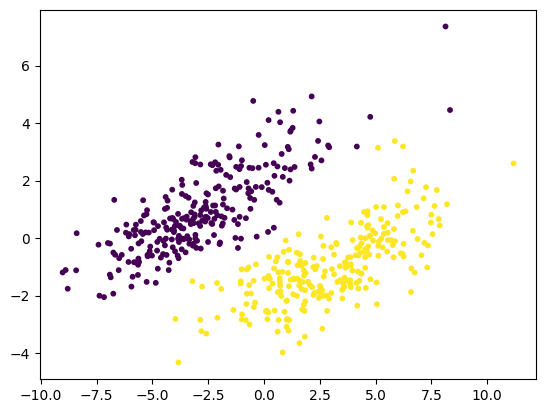

In [37]:
plt.scatter(rotated[:,0], rotated[:,1], s=10, c=df['Gender (1 - male, 0 - female)'])

HW: Rifare togliendo la variabile 'gender' dal df su cui si calcola la PCA e vedere se comunque i generi si separano.

In [42]:
from scipy.stats import multinomial

p = [0.4, 0.3, 0.2, 0.1]
n = 20
sample = multinomial.rvs(n, p, size=1000)

In [44]:
sample[0:3]

array([[9, 8, 1, 2],
       [8, 8, 2, 2],
       [7, 7, 3, 3]])

In [47]:
sample.mean(axis=0)/20

array([0.39555, 0.3025 , 0.19865, 0.1033 ])

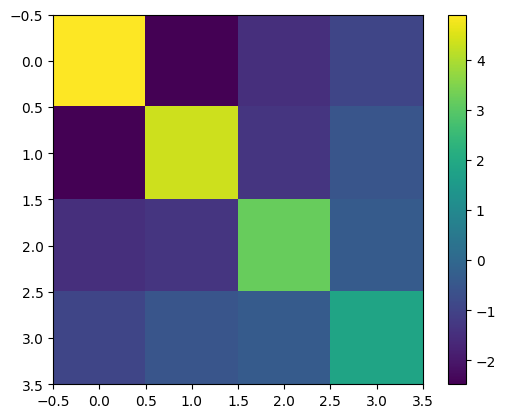

[[ 4.90398298 -2.47902903 -1.49189489 -0.93305906]
 [-2.47902903  4.34384384 -1.32897898 -0.53583584]
 [-1.49189489 -1.32897898  3.18745846 -0.36658458]
 [-0.93305906 -0.53583584 -0.36658458  1.83547948]]


In [55]:
cov_mnm = np.cov(sample, rowvar=False)

plt.imshow(cov_mnm)
plt.colorbar()
plt.show()

print(cov_mnm)

HW: fare la PCA di questo campione e graficare le prime due componenti.

HW: cercare online come generare un vettore multinomiale, usando più volte un generatore di binomiali **indipendenti**.

In [56]:
from scipy.stats import dirichlet

alpha = [1, 2, 1]

sample_dir = dirichlet.rvs(alpha, size=1000)

In [57]:
sample_dir[0:4]

array([[0.35719005, 0.54803848, 0.09477147],
       [0.12339572, 0.80535606, 0.07124822],
       [0.18905187, 0.71325958, 0.09768855],
       [0.28205367, 0.31670843, 0.4012379 ]])

In [59]:
alpha_large = [100, 200, 100]

dirichlet.rvs(alpha_large, size=4)

array([[0.24406565, 0.4727072 , 0.28322714],
       [0.24204018, 0.49145969, 0.26650013],
       [0.25204574, 0.520991  , 0.22696326],
       [0.2358164 , 0.54651523, 0.21766838]])

HW: Cercare online come generare un vettore di Dirichlet, usando più volte un generatore di Gamma **indipendenti**.

In [71]:
from scipy.stats import multivariate_normal

cov_m = [[1, 1, 2], [1, 2, 3], [2, 3, 6]]
cov_m = np.array(cov_m)
print(cov_m)

np.linalg.eig(cov_m) # Verifico che sia definita positiva

[[1 1 2]
 [1 2 3]
 [2 3 6]]


EigResult(eigenvalues=array([8.29085937, 0.28311858, 0.42602205]), eigenvectors=array([[-0.29312841, -0.84402963,  0.44909879],
       [-0.44909879, -0.29312841, -0.84402963],
       [-0.84402963,  0.44909879,  0.29312841]]))

In [73]:
mean = np.array([2, 1, 0])

sample_N = multivariate_normal.rvs(mean=mean, cov=cov_m, size=1000)

In [75]:
sample_N.shape

(1000, 3)

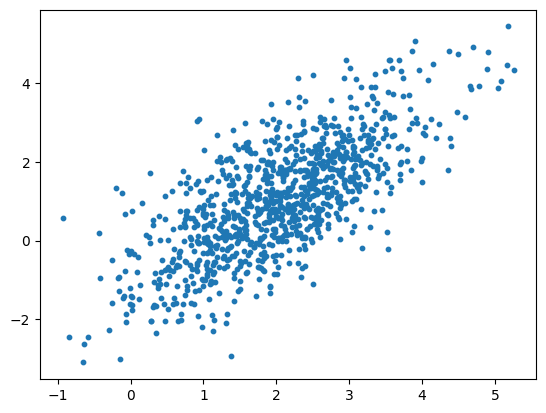

In [78]:
plt.scatter(sample_N[:,0], sample_N[:,1], s=10)

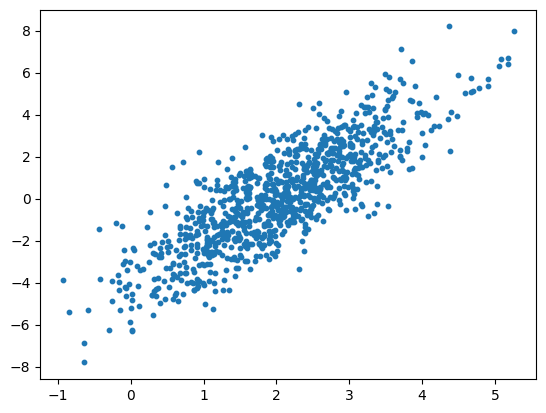

In [79]:
plt.scatter(sample_N[:,0], sample_N[:,2], s=10)

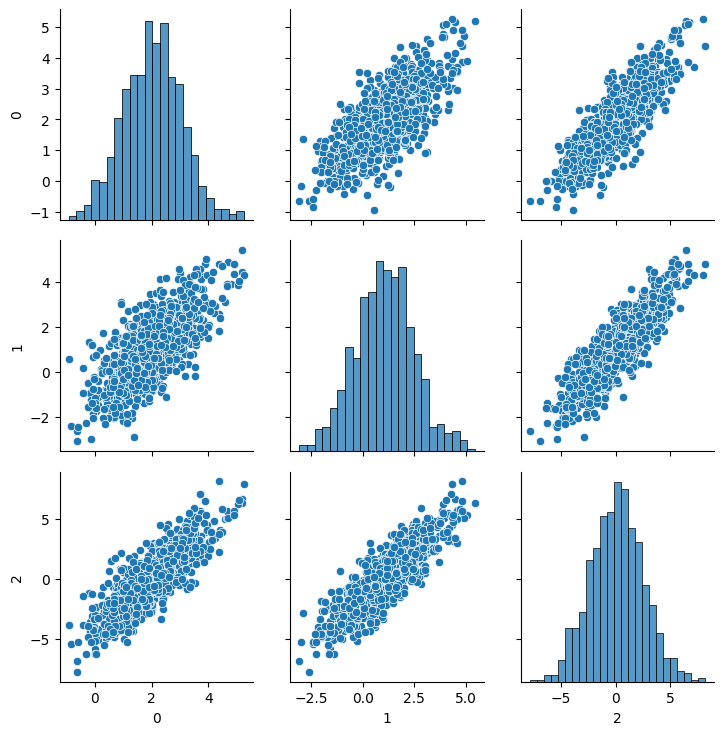

In [84]:
import seaborn as sns

g = sns.PairGrid(pd.DataFrame(sample_N))
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)


In [88]:
cov_m = [[4, -.5, 2], [-.5, 2, 3], [2, 3, 8]]
cov_m = np.array(cov_m)
print(cov_m)

np.linalg.eig(cov_m) # Verifico che sia definita positiva

[[ 4.  -0.5  2. ]
 [-0.5  2.   3. ]
 [ 2.   3.   8. ]]


EigResult(eigenvalues=array([9.73543606, 3.95272587, 0.31183808]), eigenvectors=array([[-0.28493833,  0.89601508,  0.34053945],
       [-0.33053043, -0.4253214 ,  0.84252676],
       [-0.8997554 , -0.12750952, -0.41735062]]))

In [89]:
mean = np.array([2, 1, 0])

sample_N = multivariate_normal.rvs(mean=mean, cov=cov_m, size=1000)

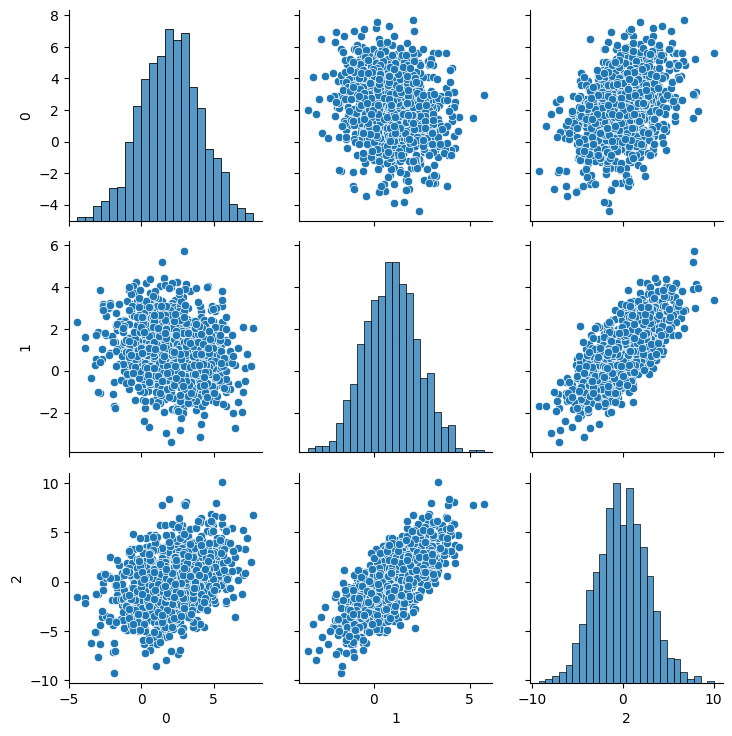

In [90]:
g = sns.PairGrid(pd.DataFrame(sample_N))
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

Vediamo come generare a mano la stessa distribuzione.

In [91]:
print(cov_m)

[[ 4.  -0.5  2. ]
 [-0.5  2.   3. ]
 [ 2.   3.   8. ]]


In [98]:
lambd = np.linalg.eig(cov_m).eigenvalues
v = np.linalg.eig(cov_m).eigenvectors
print(lambd)
print(v)

[9.73543606 3.95272587 0.31183808]
[[-0.28493833  0.89601508  0.34053945]
 [-0.33053043 -0.4253214   0.84252676]
 [-0.8997554  -0.12750952 -0.41735062]]


In [100]:
lambd = np.diag(lambd)
print(lambd)

[[9.73543606 0.         0.        ]
 [0.         3.95272587 0.        ]
 [0.         0.         0.31183808]]


In [101]:
np.matmul(cov_m, v)

array([[-2.77399891,  3.541702  ,  0.10619317],
       [-3.2178579 , -1.68117889,  0.26273192],
       [-8.75951116, -0.50401017, -0.13014582]])

In [102]:
np.matmul(v, lambd)

array([[-2.77399891,  3.541702  ,  0.10619317],
       [-3.2178579 , -1.68117889,  0.26273192],
       [-8.75951116, -0.50401017, -0.13014582]])

In [103]:
np.diag(lambd)

array([9.73543606, 3.95272587, 0.31183808])

In [120]:
Y = [np.random.normal(loc=0, scale=np.sqrt(var), size=1000) for var in np.diag(lambd)]

In [121]:
Y = np.array(Y)

In [122]:
Y.shape

(3, 1000)

In [123]:
X = np.matmul(v, Y)

In [124]:
X = X.T

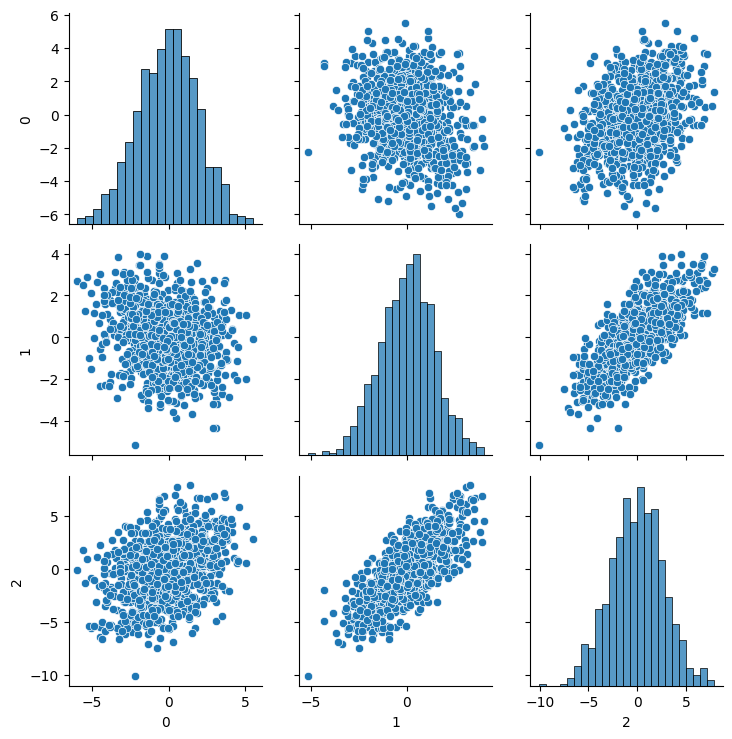

In [125]:
g = sns.PairGrid(pd.DataFrame(X))
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

HW: Trovare visualizzazioni per le distribuzioni congiunte: pdf in 3 dimensioni, oppure per curve di livello.

In [128]:
# Campione Gamma per poi fare MLE

from scipy.stats import gamma

alpha = 3.5
beta = 6

sample_gamma = gamma.rvs(a=alpha, scale=beta, size=1000)

In [133]:
print(f'Sample mean is {sample_gamma.mean():g}, mean is {alpha*beta}')

Sample mean is 20.7834, mean is 21.0


HW: Provare a calcolare la likelihood e trovare gli stimatori ML.